<h1>Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [84]:
data = pd.read_csv("train.csv", index_col = 0)
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
print("Number of passengers", len(data.index))

Number of passengers 891


<h1>Analyzing Data

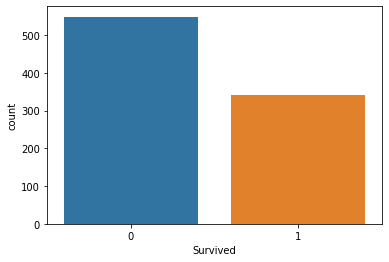

In [22]:
%matplotlib inline
sns.countplot(x = "Survived",data=data)

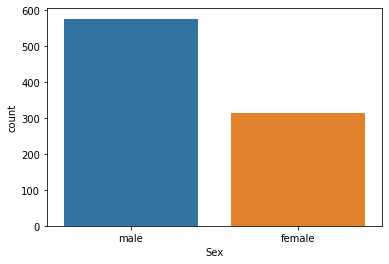

In [24]:
sns.countplot( x = "Sex", data = data)

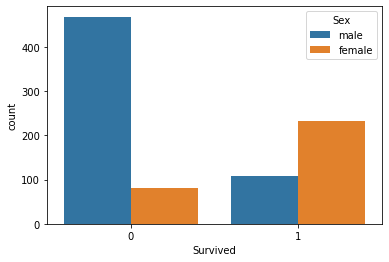

In [25]:
sns.countplot(x = "Survived", hue="Sex", data=data)

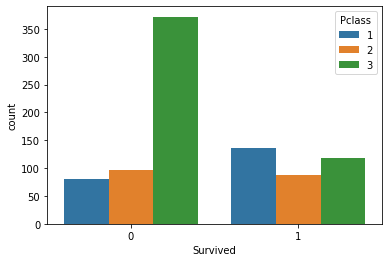

In [26]:
sns.countplot(x= "Survived", hue="Pclass", data=data)

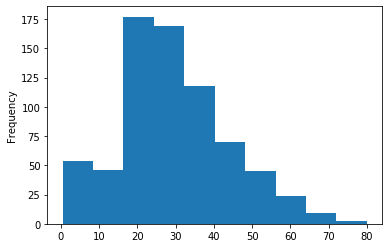

In [29]:
data["Age"].plot.hist()

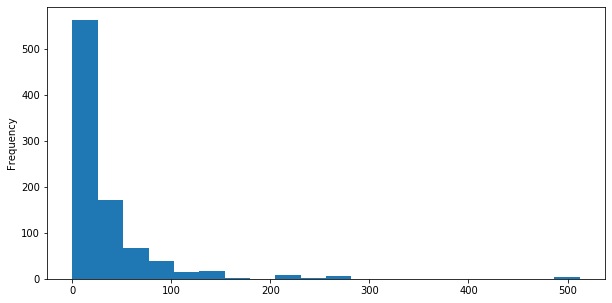

In [33]:
data["Fare"].plot.hist(bins = 20, figsize = (10,5))

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


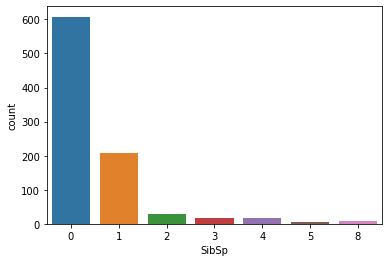

In [35]:
sns.countplot(x="SibSp", data = data)

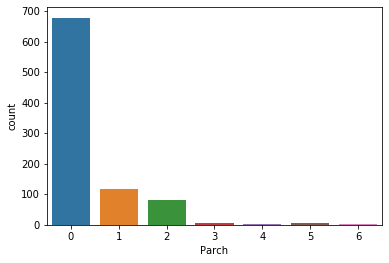

In [36]:
sns.countplot(x = "Parch", data = data)

In [41]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

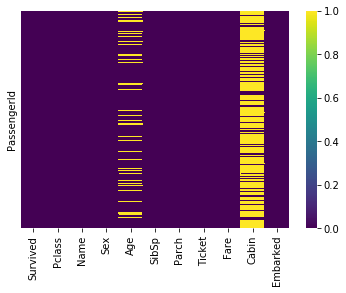

In [50]:
sns.heatmap(data.isnull(), yticklabels= False, cmap = "viridis")

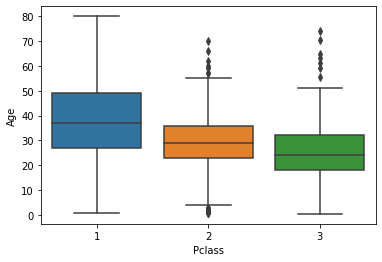

In [51]:
sns.boxplot(x="Pclass", y="Age", data = data)

<h1>Data Wrangling

In [85]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
data.drop("Cabin", axis = 1, inplace = True)

In [87]:
data.dropna(inplace = True)

In [88]:
len(data.index)

712

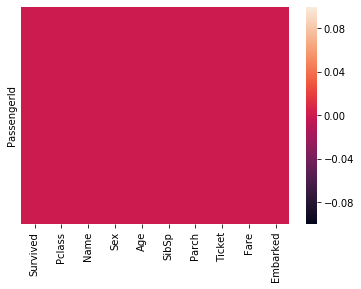

In [89]:
sns.heatmap(data.isnull(), yticklabels = False)

In [90]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [73]:
sex = pd.get_dummies(data["Sex"], drop_first = True)
sex.head(5)

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [78]:
embarked = pd.get_dummies(data["Embarked"], drop_first = True)
embarked.head(5)

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [80]:
pcl = pd.get_dummies(data["Pclass"], drop_first = True)
pcl.head(5)

,2,3
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,0
5,0,1


In [91]:
data = pd.concat([data, sex, embarked, pcl], axis = 1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [94]:
data.drop(["Pclass","Sex","Embarked","Name", "Ticket"], axis = 1, inplace = True)

In [96]:
data.reset_index(inplace = True)

In [98]:
data.drop(["PassengerId"],axis = 1, inplace = True)

In [99]:
data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
707,0,39.0,0,5,29.1250,0,1,0,0,1
708,0,27.0,0,0,13.0000,1,0,1,1,0
709,1,19.0,0,0,30.0000,0,0,1,0,0
710,1,26.0,0,0,30.0000,1,0,0,0,0


<h1>Training and Testing data

In [100]:
x = data.drop(["Survived"], axis = 1)
y = data["Survived"]

In [103]:
from sklearn.model_selection import train_test_split

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 73)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
model = LogisticRegression()

In [164]:
model.fit(x_train, y_train)

/home/yuvraj/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
prediction = model.predict(x_test)

In [166]:
from sklearn.metrics import classification_report

In [167]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.88       149\n           1       0.80      0.74      0.77        86\n\n    accuracy                           0.84       235\n   macro avg       0.83      0.82      0.82       235\nweighted avg       0.84      0.84      0.84       235\n'

In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(y_test, prediction)

array([[133,  16],
       [ 22,  64]])

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(y_test, prediction)

0.8382978723404255

<h1>Conclusion

With Logistic Regression, we have predicted survival of any passenger with an accuracy of 83.8%.